밀도 기반 군집화의 대표 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise)이다.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)

from sklearn.datasets import load_iris

import missingno as msno


In [9]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(iris.data, columns=feature_names)

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.cluster import DBSCAN

In [19]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


특이하게 -1로 군집이 되는데 경우는 노이즈에 해당하는 값이다. 따라서 붓꽃 데이터는 0과 1로 군집화 되었다.
DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다.

In [17]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,dbscan_cluster,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


시각화하여 보기

In [20]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

print(iris_pca[:5])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [26]:
iris_df['ftr1'] = iris_pca[:,0]
iris_df['ftr2'] = iris_pca[:,1]

In [28]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,dbscan_cluster,target,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


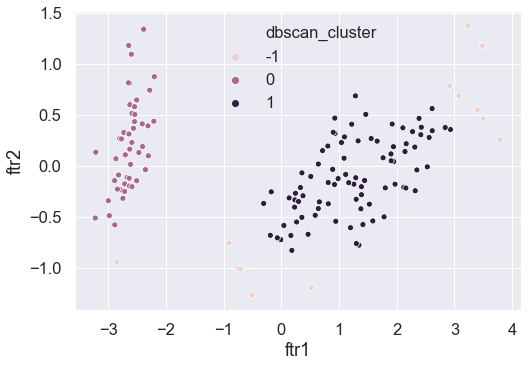

In [30]:
sns.scatterplot(iris_df['ftr1'], iris_df['ftr2'], hue=iris_df['dbscan_cluster'])

엡실론을 0.6에서 0.8로 늘려서 군집화 해보자.

In [31]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


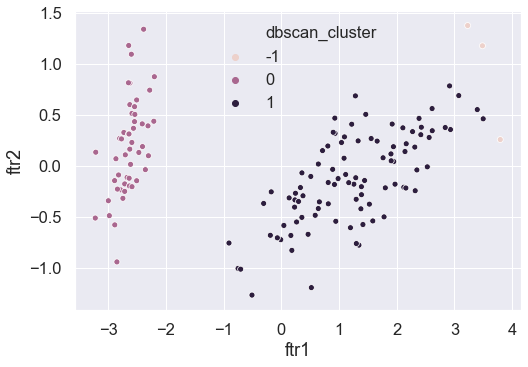

In [32]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

iris_df['ftr1'] = iris_pca[:,0]
iris_df['ftr2'] = iris_pca[:,1]

sns.scatterplot(iris_df['ftr1'], iris_df['ftr2'], hue=iris_df['dbscan_cluster'])

노이즈가 -3으로 줄었고, eps 반경이 커지면서 노이즈로 분류되었던 데이터 세트가 cluster1으로 소속되었다.

min_sample을 8에서 16으로 늘려보자

In [33]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


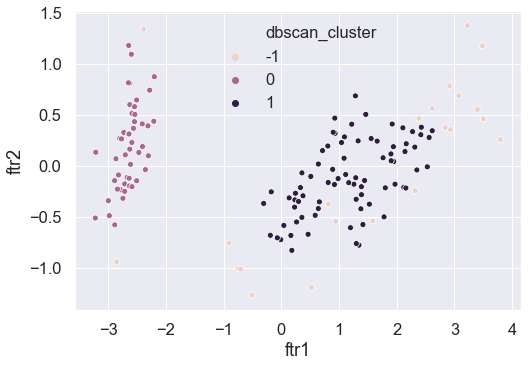

In [34]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

iris_df['ftr1'] = iris_pca[:,0]
iris_df['ftr2'] = iris_pca[:,1]

sns.scatterplot(iris_df['ftr1'], iris_df['ftr2'], hue=iris_df['dbscan_cluster'])

노이즈가 기존보다 증가했다.

In [37]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle = True, noise=0.05, random_state=0, factor=0.5)

cluster_df = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

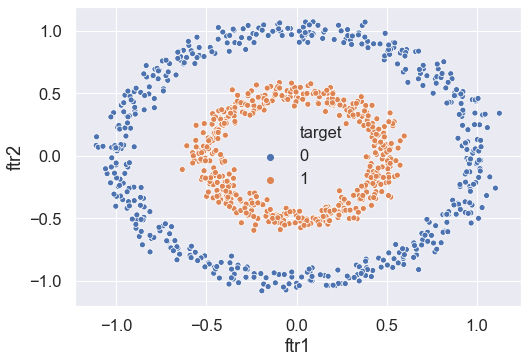

In [38]:
sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['target'])

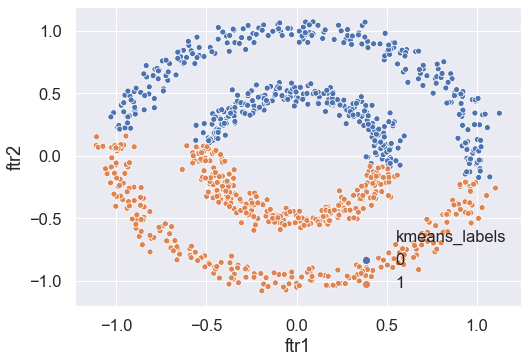

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_labels'] = kmeans_labels

sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['kmeans_labels'])

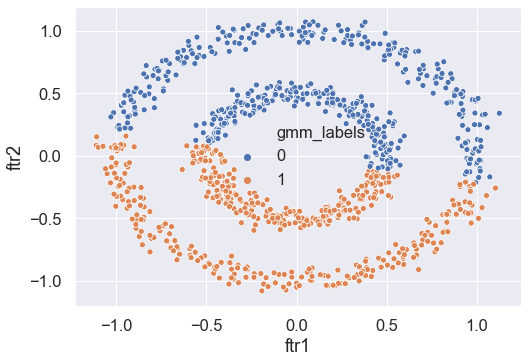

In [46]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, max_iter=1000)
gmm_labels = gmm.fit_predict(X)
cluster_df['gmm_labels'] = gmm_labels

sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['gmm_labels'])

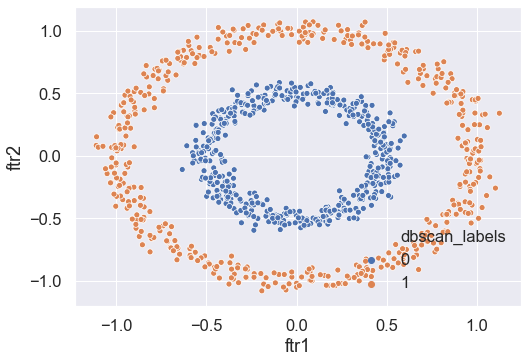

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_labels'] = dbscan_labels

sns.scatterplot(cluster_df['ftr1'], cluster_df['ftr2'], hue=cluster_df['dbscan_labels'])